In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

output_dir = os.path.join(os.getcwd(), '../output')
figure_dir = os.path.join(os.getcwd(), '/figures')

# Problem 5

In [78]:
output_dir

'/home/jofje7431/Documents/Projects/FYS3150/FYS3150_projects/Project2/solutions/../output'

In [79]:
with open(os.path.join(output_dir, 'problem5data.out'), 'r') as f:
    problem5df = pd.read_csv(f, sep=',')

type = {1: 'Tridiagonal', 2: 'Tridiagonal w.o. 1/h^2', 3: 'Random symmetric'}
problem5df['Type'] = problem5df['Type'].map(type)

In [80]:
problem5df['Ierations / N'] = problem5df['Iterations'] / (problem5df['N'])
problem5df

,N,Converged,Iterations,Type,Ierations / N
0,2.0,1.0,1.0,Tridiagonal,0.500000
1,4.0,1.0,6.0,Tridiagonal,1.500000
2,8.0,1.0,81.0,Tridiagonal,10.125000
3,16.0,1.0,376.0,Tridiagonal,23.500000
4,32.0,1.0,1541.0,Tridiagonal,48.156250
5,64.0,1.0,6413.0,Tridiagonal,100.203125
6,128.0,1.0,25823.0,Tridiagonal,201.742188
7,256.0,1.0,104206.0,Tridiagonal,407.054688
8,2.0,1.0,1.0,Tridiagonal w.o. 1/h^2,0.500000
9,4.0,1.0,6.0,Tridiagonal w.o. 1/h^2,1.500000


In [83]:
problem5df[problem5df['Type'] == 'Tridiagonal'][[col for col in problem5df.columns if col not in ['Type', 'Converged']]]

,N,Iterations,Ierations / N
0,2.0,1.0,0.500000
1,4.0,6.0,1.500000
2,8.0,81.0,10.125000
3,16.0,376.0,23.500000
4,32.0,1541.0,48.156250
5,64.0,6413.0,100.203125
6,128.0,25823.0,201.742188
7,256.0,104206.0,407.054688
24,512.0,419619.0,819.568359


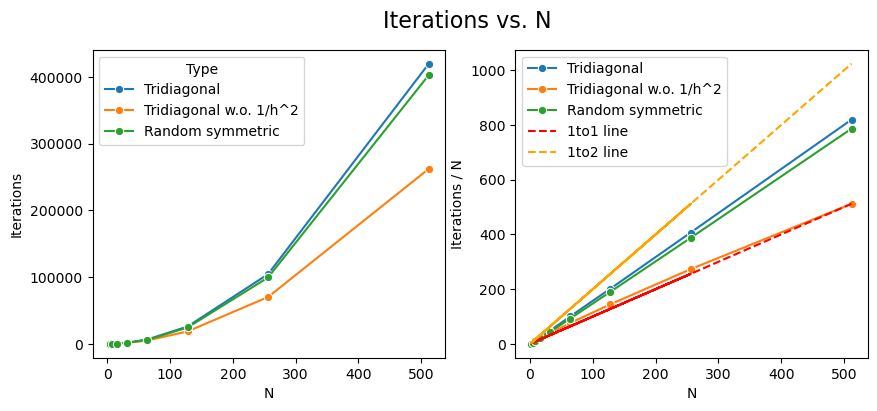

In [73]:
fig, axs = plt.subplots(ncols= 2, figsize=(10, 4))

plot_df = problem5df[problem5df['Converged'] == 1.0]
sns.lineplot(
    data=plot_df, 
    x='N', 
    y='Iterations',
    hue='Type', 
    ax=axs[0], 
    marker='o',
    )

sns.lineplot(
    data=plot_df,
    x='N',
    y='Ierations / N',
    hue='Type',
    ax=axs[1], 
    marker='o',
    )

axs[1].plot(plot_df['N'], plot_df['N'], color='red', linestyle='dashed', label='1to1 line')
axs[1].plot(plot_df['N'], 2*plot_df['N'], color='orange', linestyle='dashed', label='1to2 line')
axs[0].set(xlabel='N', ylabel='Iterations')
axs[1].set(xlabel='N', ylabel='Iterations / N')

plt.legend()
fig.suptitle('Iterations vs. N', fontsize=16)
plt.show()


# Problem 6

In [129]:
with open(os.path.join(output_dir, 'problem6data.out'), 'r') as f:
    lines = f.readlines()

j_eig = None
a_eig = None
df_lines = []

for i, line in enumerate(lines):
    if "jacobi eigenvalues" in line:
        j_eig = lines[i+1].strip()
        j_eig = np.fromstring(j_eig, dtype=float, sep=' ')

    elif "analytical eigenvalues" in line:
        a_eig = lines[i+1].strip()
        a_eig = np.fromstring(a_eig, dtype=float, sep=' ')

    elif "eigenvectors:" in line:
        df_lines = [l.strip() for l in lines[i+1:-1]]

        break

df = pd.DataFrame([line.strip().split(",") for line in df_lines[1:]])
df.columns = [col.strip() for col in df_lines[0].strip().split(",")]
for col in df.columns:
    df[col] = df[col].astype(float)

df

,x,j_v1,j_v2,j_v3,a_v1,a_v2,a_v3
0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
1,0.1,0.138197,2.628656e-01,-0.361803,0.138197,2.628656e-01,0.361803
2,0.2,0.262866,4.253254e-01,-0.425325,0.262866,4.253254e-01,0.425325
3,0.3,0.361803,4.253254e-01,-0.138197,0.361803,4.253254e-01,0.138197
4,0.4,0.425325,2.628655e-01,0.262866,0.425325,2.628656e-01,-0.262866
5,0.5,0.447214,6.758095e-09,0.447214,0.447214,5.476787e-17,-0.447214
6,0.6,0.425325,-2.628656e-01,0.262866,0.425325,-2.628656e-01,-0.262866
7,0.7,0.361803,-4.253254e-01,-0.138197,0.361803,-4.253254e-01,0.138197
8,0.8,0.262866,-4.253254e-01,-0.425325,0.262866,-4.253254e-01,0.425325
9,0.9,0.138197,-2.628656e-01,-0.361803,0.138197,-2.628656e-01,0.361803


In [131]:
df_long = pd.DataFrame()
for col in df.columns[1:]:
    
    temp_df = pd.DataFrame({'x': df['x'], 
                            'eigenvec': [col]*len(df), 
                            'value': df[col]})
    df_long = pd.concat([df_long, temp_df])

df_long

,x,eigenvec,value
0,0.0,j_v1,0.000000
1,0.1,j_v1,0.138197
2,0.2,j_v1,0.262866
3,0.3,j_v1,0.361803
4,0.4,j_v1,0.425325
...,...,...,...
6,0.6,a_v3,-0.262866
7,0.7,a_v3,0.138197
8,0.8,a_v3,0.425325
9,0.9,a_v3,0.361803


/tmp/ipykernel_4722/4110833934.py:5: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_4722/4110833934.py:13: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.lineplot(


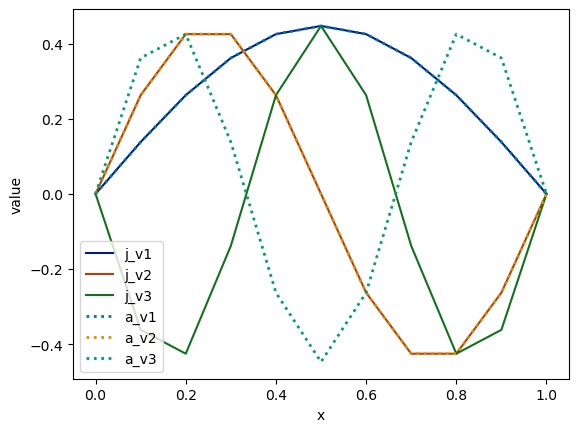

In [158]:
fig, ax = plt.subplots()

palette1 = sns.color_palette("dark", 8)
palette2 = sns.color_palette("colorblind", 8)  # For 'a' lines
sns.lineplot(
        data = df_long[df_long['eigenvec'].str.contains('j', case=False)],
        x='x',
        y='value',
        hue='eigenvec',       
        palette=palette1, 
        ax=ax
    )
sns.lineplot(
        data = df_long[df_long['eigenvec'].str.contains('a', case=False)],
        x='x',
        y='value',
        hue='eigenvec',            
        linestyle= 'dotted',
        linewidth=2,  # Increase this value for thicker lines
        palette=palette2,
        ax=ax
    )

plt.legend()
plt.show()


In [161]:
with open(os.path.join(output_dir, 'p6100.out'), 'r') as f:
    problem6100df = pd.read_csv(f, sep=',')

problem6100df
df_long = pd.DataFrame()
for col in df.columns[1:]:
    
    temp_df = pd.DataFrame({'x': problem6100df['x'], 
                            'eigenvec': [col]*len(problem6100df), 
                            'value': problem6100df[col]})
    df_long = pd.concat([df_long, temp_df])

df_long

,x,eigenvec,value
0,0.00,j_v1,0.000000
1,0.01,j_v1,0.004442
2,0.02,j_v1,0.008880
3,0.03,j_v1,0.013309
4,0.04,j_v1,0.017725
...,...,...,...
96,0.96,a_v3,0.052061
97,0.97,a_v3,0.039455
98,0.98,a_v3,0.026500
99,0.99,a_v3,0.013309


/tmp/ipykernel_4722/4110833934.py:5: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_4722/4110833934.py:13: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.lineplot(


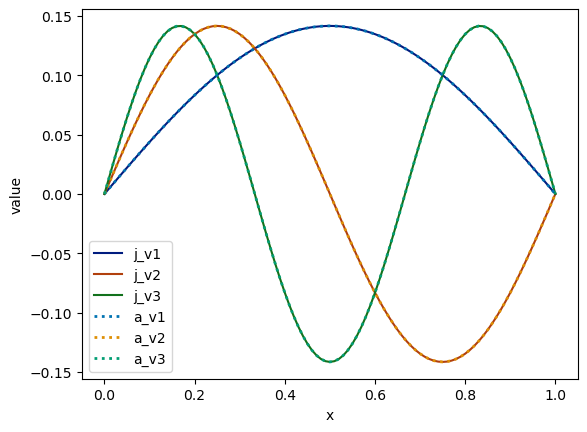

In [162]:
fig, ax = plt.subplots()

palette1 = sns.color_palette("dark", 8)
palette2 = sns.color_palette("colorblind", 8)  # For 'a' lines
sns.lineplot(
        data = df_long[df_long['eigenvec'].str.contains('j', case=False)],
        x='x',
        y='value',
        hue='eigenvec',       
        palette=palette1, 
        ax=ax
    )
sns.lineplot(
        data = df_long[df_long['eigenvec'].str.contains('a', case=False)],
        x='x',
        y='value',
        hue='eigenvec',            
        linestyle= 'dotted',
        linewidth=2,  # Increase this value for thicker lines
        palette=palette2,
        ax=ax
    )

plt.legend()
plt.show()
